In [1]:
!pip install yfinance pandas matplotlib

In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import operator

In [9]:
def maior_lucro(lista_precos):
    menor_preco = lista_precos[0]
    maior_lucro = 0
    data_menor_preco = lista_precos.index[0]

    for dia in lista_precos.index:
        preco = lista_precos[dia]
        if preco < menor_preco:
            menor_preco      = preco
            data_menor_preco = dia
        tentativa_lucro = preco - menor_preco

        if tentativa_lucro > maior_lucro:
            data_menor_preco_maior_lucro = data_menor_preco
            data_maior_preco_maior_lucro = dia
            maior_lucro = tentativa_lucro
            
    return data_menor_preco_maior_lucro, data_maior_preco_maior_lucro

In [10]:
FINANCEIRO  = ['B3SA3.SA', 'BIDI4.SA', 'BPAC11.SA', 'BPAN4.SA', 'ITUB4.SA', 'BBAS3.SA']
MATERIAIS   = ['CSNA3.SA', 'FESA3.SA', 'GGBR4.SA', 'SUZB3.SA', 'UNIP6.SA', 'USIM5.SA', 'VALE3.SA', 'PRIO3.SA', 'CSAN3.SA']
SMALL_CAPS  = ['STBP3.SA', 'TASA4.SA', 'PTBL3.SA', 'ROMI3.SA', 'EMBR3.SA']
VAREJO      = ['MGLU3.SA', 'VVAR3.SA', 'AMAR3.SA', 'LAME3.SA']

In [11]:
setores = [FINANCEIRO, MATERIAIS, SMALL_CAPS, VAREJO]
print('ESCOLHA O SETOR PARA VISUALIZAR GRÁFICOS: ')
print('0) FINANCEIRO')
print('1) MATERIAIS')
print('2) SMALL_CAPS')
print('3) VAREJO')
print('4) TODAS')
i = int(input())
if i == 4:
    s = FINANCEIRO + MATERIAIS + SMALL_CAPS + VAREJO
else:
    s = setores[i]

ESCOLHA O SETOR PARA VISUALIZAR GRÁFICOS: 
0) FINANCEIRO
1) MATERIAIS
2) SMALL_CAPS
3) VAREJO
4) TODAS


 0


In [12]:
dia_inicial = '2019-12-01'
dia_final   = '2021-09-06'

In [13]:
data   = yf.download(s, start=dia_inicial, end=dia_final)['Adj Close'].dropna()

[*********************100%***********************]  6 of 6 completed


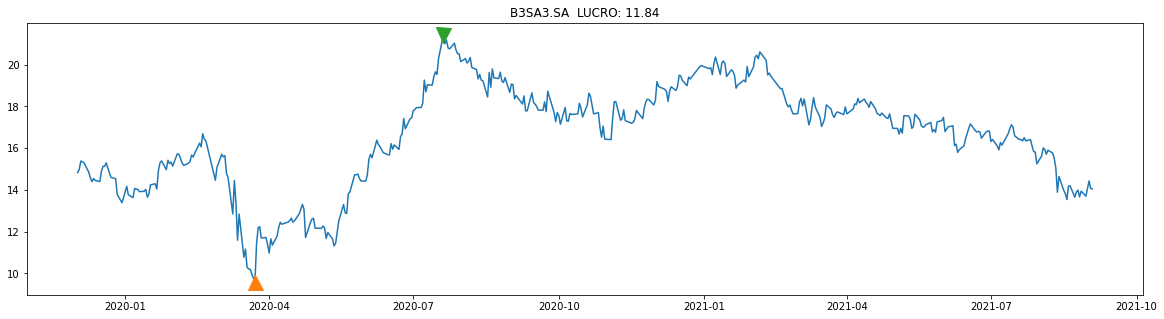

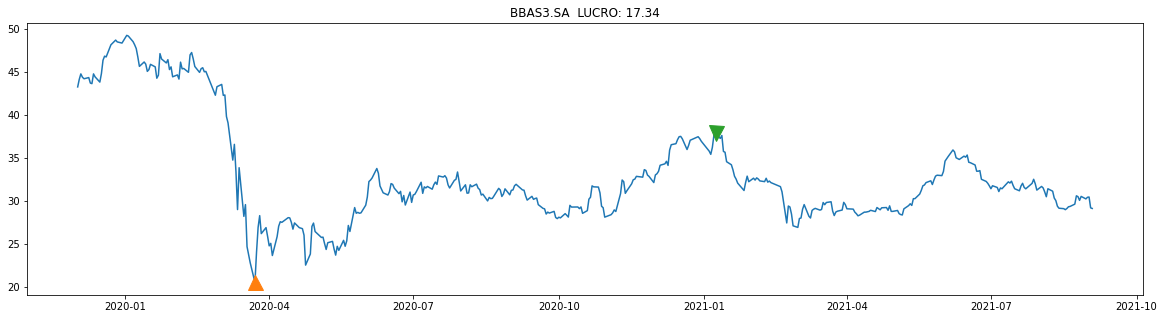

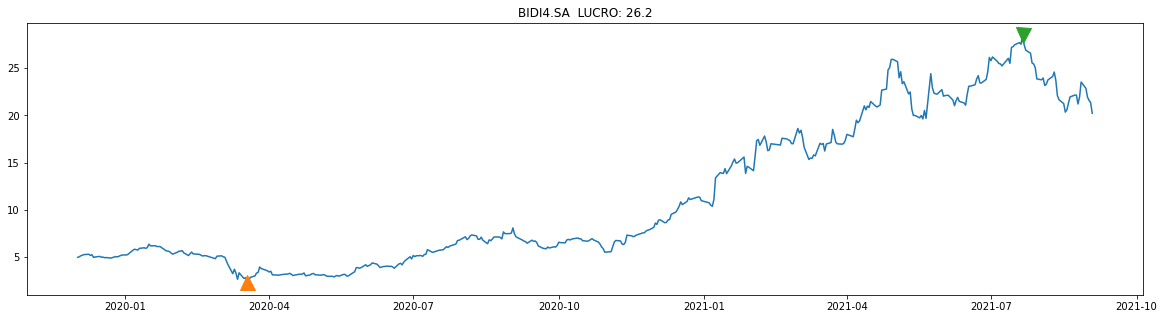

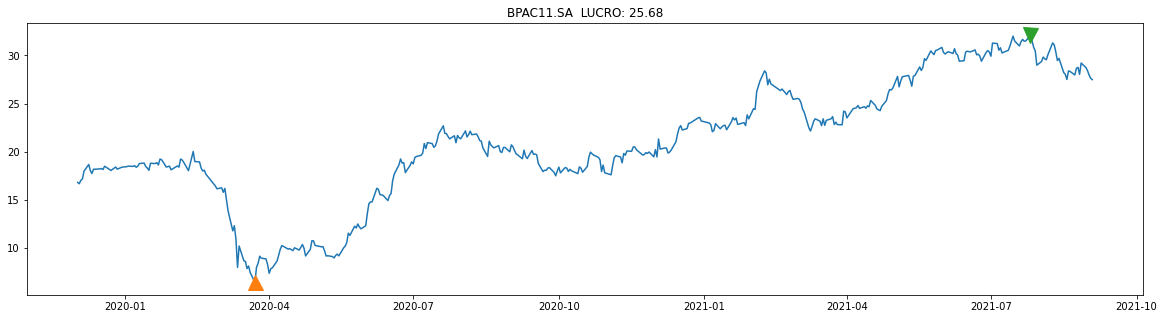

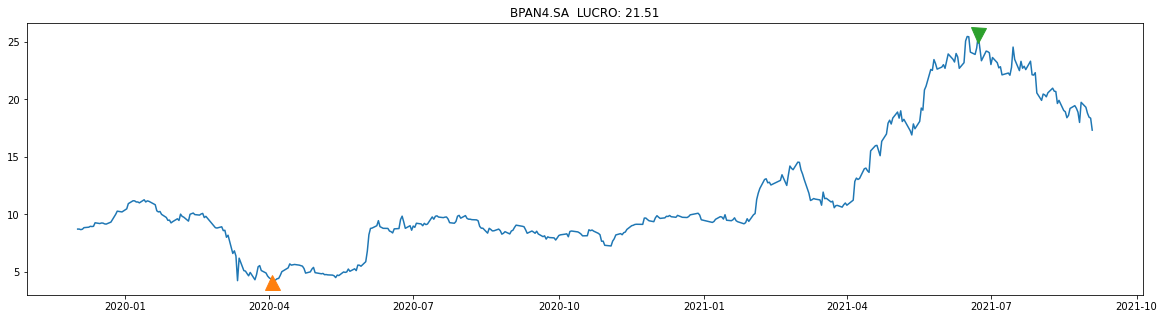

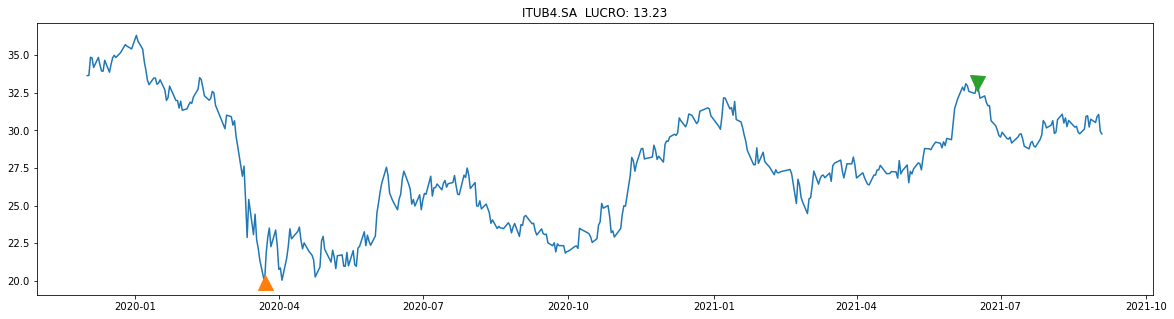

In [14]:
for acao in data.columns:
    data_menor_preco_maior_lucro, data_maior_preco_maior_lucro = maior_lucro(data[acao])
    plt.figure(figsize=(20,5))
    plt.plot(data[acao])
    plt.plot(data_menor_preco_maior_lucro, data[acao][data_menor_preco_maior_lucro], "^", markersize=15)
    plt.plot(data_maior_preco_maior_lucro, data[acao][data_maior_preco_maior_lucro], "v", markersize=15)
    plt.title(acao+'  LUCRO: '+str(round((data[acao][data_maior_preco_maior_lucro]-data[acao][data_menor_preco_maior_lucro]),2)))
    plt.show()

In [15]:
melhores = []

for setor in setores:
    data   = yf.download(setor, start=dia_inicial, end=dia_final)['Adj Close'].dropna()
    dicionario = {}
    for acao in setor:
        data_menor_preco_maior_lucro, data_maior_preco_maior_lucro = maior_lucro(data[acao])
        lucro            = round((data[acao][data_maior_preco_maior_lucro]-data[acao][data_menor_preco_maior_lucro]),2) 
        dicionario[acao] = lucro
    print('LUCROS: ')
    print(dicionario)
    melhores.append(max(dicionario.items(), key=operator.itemgetter(1))[0])

[*********************100%***********************]  6 of 6 completed
LUCROS: 
{'B3SA3.SA': 11.84, 'BIDI4.SA': 26.2, 'BPAC11.SA': 25.68, 'BPAN4.SA': 21.51, 'ITUB4.SA': 13.23, 'BBAS3.SA': 17.34}
[*********************100%***********************]  9 of 9 completed
LUCROS: 
{'CSNA3.SA': 44.81, 'FESA3.SA': 42.33, 'GGBR4.SA': 28.31, 'SUZB3.SA': 54.56, 'UNIP6.SA': 93.64, 'USIM5.SA': 18.65, 'VALE3.SA': 86.59, 'PRIO3.SA': 19.42, 'CSAN3.SA': 16.07}
[*********************100%***********************]  5 of 5 completed
LUCROS: 
{'STBP3.SA': 6.92, 'TASA4.SA': 26.45, 'PTBL3.SA': 17.45, 'ROMI3.SA': 32.36, 'EMBR3.SA': 17.65}
[*********************100%***********************]  4 of 4 completed
LUCROS: 
{'MGLU3.SA': 20.38, 'VVAR3.SA': 17.19, 'AMAR3.SA': 6.26, 'LAME3.SA': 18.97}


In [16]:
print('CARTEIRA COM AS AÇÕES COM OS MELHORES LUCROS POR SETOR DE ATUAÇÃO\n')
print(melhores)
data   = yf.download(melhores, start=dia_inicial, end=dia_final)['Adj Close'].dropna()

CARTEIRA COM AS AÇÕES COM OS MELHORES LUCROS POR SETOR DE ATUAÇÃO

['BIDI4.SA', 'UNIP6.SA', 'ROMI3.SA', 'MGLU3.SA']
[*********************100%***********************]  4 of 4 completed


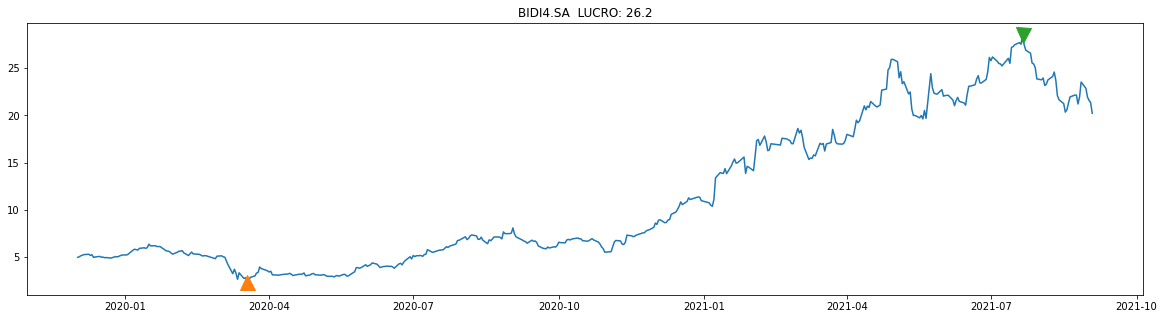

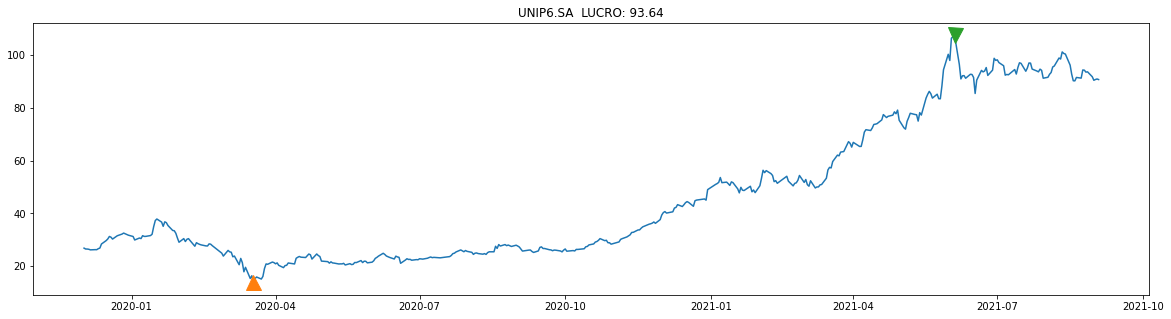

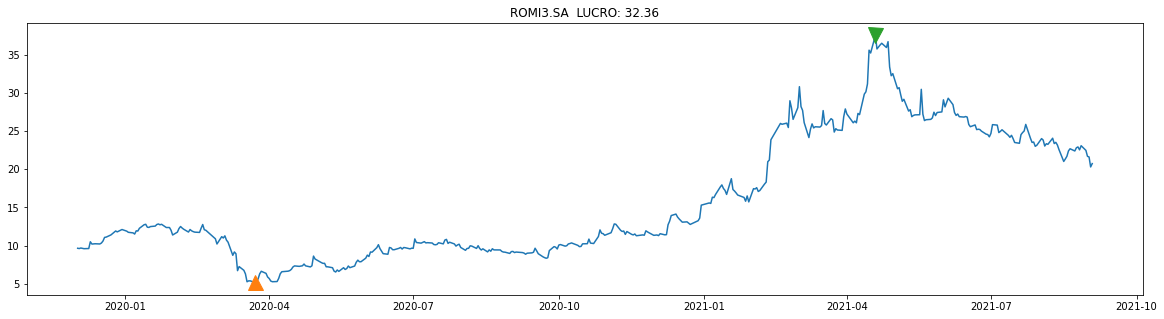

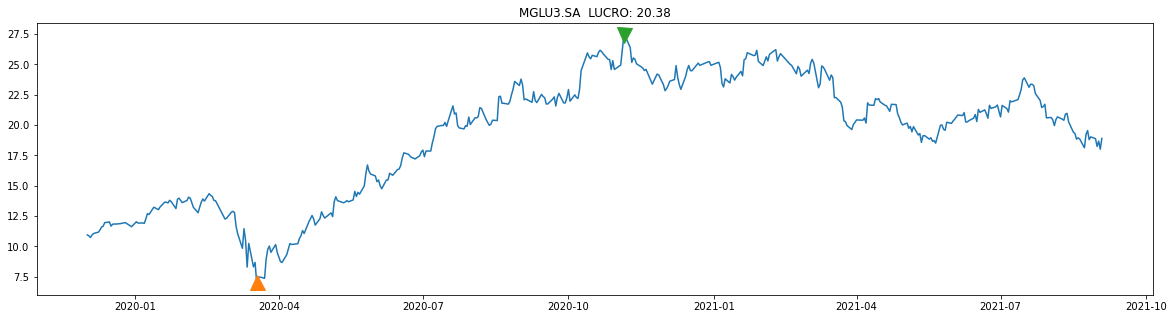

In [17]:
for acao in melhores:
    data_menor_preco_maior_lucro, data_maior_preco_maior_lucro = maior_lucro(data[acao])
    plt.figure(figsize=(20,5))
    plt.plot(data[acao])
    plt.plot(data_menor_preco_maior_lucro, data[acao][data_menor_preco_maior_lucro], "^", markersize=15)
    plt.plot(data_maior_preco_maior_lucro, data[acao][data_maior_preco_maior_lucro], "v", markersize=15)
    plt.title(acao+'  LUCRO: '+str(round((data[acao][data_maior_preco_maior_lucro]-data[acao][data_menor_preco_maior_lucro]),2)))
    plt.show()